In [7]:
# Regression Neural Network

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
df = pd.read_csv('flats_prep.csv', sep=';')

In [3]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
dfsc = sc.fit_transform(df)
df['rooms'] = dfsc[:,0]
df['m2'] = dfsc[:,3]
df['price'] = dfsc[:,5]

In [4]:
# Cheking correlations
df.corr()

,rooms,location,condition,m2,type,price
rooms,1.000000,-0.060645,-0.342692,0.738398,0.272505,0.594447
location,-0.060645,1.000000,-0.122117,-0.288718,0.109806,-0.316291
condition,-0.342692,-0.122117,1.000000,-0.082482,-0.769335,-0.163575
m2,0.738398,-0.288718,-0.082482,1.000000,-0.043620,0.885215
type,0.272505,0.109806,-0.769335,-0.043620,1.000000,0.020591
price,0.594447,-0.316291,-0.163575,0.885215,0.020591,1.000000


In [5]:
# Splitting the dataset into the Training set and Test set
X = df.iloc[:, 0:4].values
y = df.iloc[:, 5].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:
# Install Tensorflow
# Install Keras
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.
C:\Users\User\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\User\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\User\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\User\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519

In [7]:
# Initialising the ANN
rnn = Sequential()

# Adding the input layer and the first hidden layer
rnn.add(Dense(output_dim = 6, activation = 'tanh', input_dim = 4))

# Adding the second hidden layer
rnn.add(Dense(output_dim = 6, activation = 'tanh'))

# Adding the output layer
rnn.add(Dense(output_dim = 1, activation = 'linear'))

# Compiling the ANN
rnn.compile(optimizer='adam', loss='mean_squared_error', metrics = ['accuracy'])

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="tanh", input_dim=4, units=6)`
  """
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="tanh", units=6)`
  
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=1)`
  # This is added back by InteractiveShellApp.init_path()


In [72]:
# Fitting the ANN to the Training set
rnn.fit(X_train, y_train, batch_size = 10, nb_epoch = 100)

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/100
173/173 [==============================] - 0s 1ms/step - loss: 0.5223 - accuracy: 0.0000e+00
Epoch 2/100
173/173 [==============================] - 0s 139us/step - loss: 0.4281 - accuracy: 0.0000e+00
Epoch 3/100
173/173 [==============================] - 0s 127us/step - loss: 0.3688 - accuracy: 0.0000e+00
Epoch 4/100
173/173 [==============================] - 0s 144us/step - loss: 0.3367 - accuracy: 0.0000e+00
Epoch 5/100
173/173 [==============================] - 0s 133us/step - loss: 0.3161 - accuracy: 0.0000e+00
Epoch 6/100
173/173 [==============================] - 0s 133us/step - loss: 0.3014 - accuracy: 0.0000e+00
Epoch 7/100
173/173 [==============================] - 0s 127us/step - loss: 0.2901 - accuracy: 0.0000e+00
Epoch 8/100
173/173 [==============================] - 0s 121us/step - loss: 0.2817 - accuracy: 0.0000e+00
Epoch 9/100
173/173 [==============================] - 0s 162us/step - loss: 0.2765 - accuracy: 0.0000e+00
Epoch 10/100
173/173 [=================

In [73]:
# Predicting the Test set results
y_pred = rnn.predict(X_test)

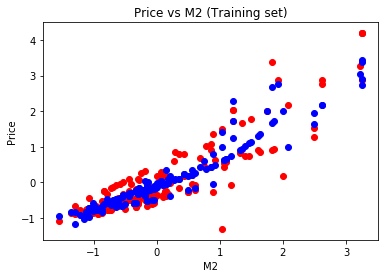

In [74]:
# Visualising the Training set results
plt.scatter(X_train[:,3], y_train, color = 'red')
plt.plot(X_train[:,3], rnn.predict(X_train), 'bo')
plt.title('Price vs M2 (Training set)')
plt.xlabel('M2')
plt.ylabel('Price')
plt.show()

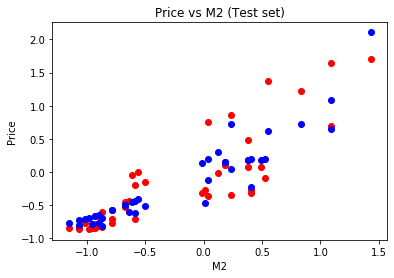

In [75]:
# Visualising the Test set results
plt.scatter(X_test[:,3], y_test, color = 'red')
plt.plot(X_test[:,3], rnn.predict(X_test), 'bo')
plt.title('Price vs M2 (Test set)')
plt.xlabel('M2')
plt.ylabel('Price')
plt.show()